<a href="https://colab.research.google.com/github/LEEAHRI/Algorithm/blob/leetcode_1/LS_DS_421_Text_Data_Assignment_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Text Preprocessing for NLP

Women's E-Commerce Clothing Reviews
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

이번 과제의 목표는: 캐글 옷 리뷰 데이터의 텍스트 칼럼(`Review Text`)에서 토큰(단어)를 추출하고 추천(`Recommended IND`)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것 입니다.

토큰을 분리하기 위해 사용 가능한 정제기술을 모두 사용하고 특히
- Lemmatization
- 확장된 불용어 처리
기술을 잘 활용해 보세요

토큰이 만들어지면 꼭 **올바른 토큰화**를 잘 만족하는지 확인 합니다. 그리고 결과를 분석하여 어떤 특성이 추천에 이르게 하는지 그래프로 설명하세요. 마크다운 셀을 최대한 활용하여 결과를 분석해 보시기 바랍니다.

### 1) Spacy 코스를 수강하세요
- chapter1의 1~5 강좌 수강 (https://course.spacy.io/en/)
  - 챕터 1, 2, 3, 4, 5를 수강하는 것은 아닙니다!
- 문항 1) chapter1-5의 강의를 들으시고, 해당 제목을 입력하시오.

In [ ]:
#

### 2) 토큰을 정제합니다. 
- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거

- 문항 2-1) 소문자로 변경하는 함수를 입력하시오. 
- 문항 2-2) re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하시오. 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [4]:
import pandas as pd

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
#2-1 소문자
#=> string.lower()
#2-2 
#=>re.sub("[^a-z0-9 ]", "", string)

In [6]:
import re

def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """

    # 정규식
    # []: [] 사이 문자를 매치, ^: not
    regex = r"[^a-z0-9 ]"

    # 치환할 문자
    subst = ""

    # 소문자로 치환
    tokens = text.lower()
    
    # 정규식 적용
    tokens = re.sub(regex, subst, tokens)

    tokens = tokens.split()

    
    return tokens

### 3) 정제한 토큰을 시각화 합니다.
- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.
- 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.
- 문항 3) 추천 토큰 순위 10개 단어를 입력하시오.

In [7]:
# 'Review Text' column 내용을 str형으로 변경
df['Review Text'] = df['Review Text'].astype(str)

# 'Review Text' column에 tokenize함수 적용
df['tokens'] = df['Review Text'].apply(tokenize)

In [11]:
# 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
from collections import Counter

def word_count(docs):

    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [12]:
## Top 10 토큰을 프린트 합니다.
## 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.

wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
42,the,19673,75568,1.0,0.055730,0.055730,0.837648
37,i,18902,58428,2.0,0.043090,0.098820,0.804820
2,and,19535,48805,3.0,0.035993,0.134813,0.831772
17,a,17747,42776,4.0,0.031547,0.166360,0.755642
41,it,16284,42325,5.0,0.031214,0.197574,0.693349
48,is,15337,30614,6.0,0.022577,0.220151,0.653027
19,this,16467,25603,7.0,0.018882,0.239033,0.701141
44,to,13827,24434,8.0,0.018020,0.257053,0.588734
24,in,12302,20550,9.0,0.015155,0.272208,0.523801
56,but,11704,16361,10.0,0.012066,0.284274,0.498339


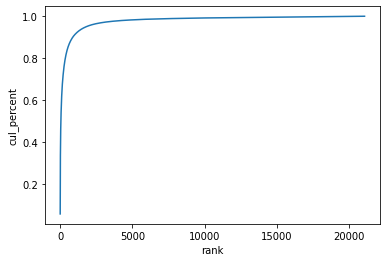

In [13]:
## 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.

import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [14]:
!pip install squarify
import squarify

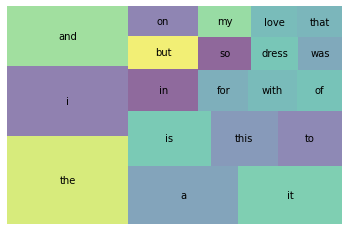

In [17]:
## 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.


import squarify
import matplotlib.pyplot as plt



# 추천

df_rec = df[df['Recommended IND'] == 1]
wc_rec = word_count(df_rec['tokens'])


color=['viridis']

wc_top20_rec = wc_rec[wc_rec['rank'] <= 20]
squarify.plot(sizes=wc_top20_rec['percent'], label=wc_top20_rec['word'], alpha=0.6)
plt.axis('off')
plt.show()

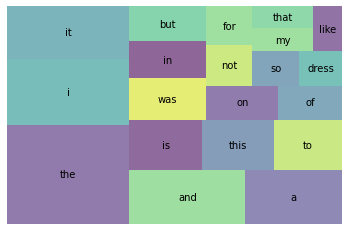

In [18]:
# 비추천

df_N_rec = df[df['Recommended IND'] == 0]
wc = word_count(df_N_rec['tokens'])



color=['viridis']

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.

- 문항 4) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하시오.

In [19]:
df_rec = df[df['Recommended IND'] == 1]
wc = word_count(df_rec['tokens'])
print(wc.head(10)['word'].to_list())

['the', 'i', 'and', 'a', 'it', 'is', 'this', 'to', 'in', 'but']


### 5) 통계적 트리밍 사용 전/후 토큰 분포를 비교합니다.
- 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 선택한 뒤,
- 통계적 트리밍 사용 전/후 토큰 분포 시각화하고,
- 문항 5-1) 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.
- 문항 5-2) 불용어 처리 & 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.

In [20]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,tokens
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, and, sexy, and,..."
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, this, dress, its, sooo, pretty, i, happ..."
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[i, had, such, high, hopes, for, this, dress, ..."
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[i, love, love, love, this, jumpsuit, its, fun..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[this, shirt, is, very, flattering, to, all, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[i, was, very, happy, to, snag, this, dress, a..."
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[it, reminds, me, of, maternity, clothes, soft..."
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"[this, fit, well, but, the, top, was, very, se..."
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[i, bought, this, dress, for, a, wedding, i, h..."


In [21]:
df['Review Text'] = df['Review Text'].astype(str)

In [23]:
import spacy
from spacy.tokenizer import Tokenizer


### 6) Lemmatization 사용 효과를 분석해 봅니다.
- 문항 6-1) Stemming한 뒤 상위 10개 단어를 입력하시오.
- 문항 6-2) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하시오.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

### 도전과제🔥 
- Spacy 기능을 추가적으로 한 가지 사용해 봅니다.
- 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 